# **Exercício 03**

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.lib import scimath as SM
import dslab as ds

## Parâmetros

In [2]:
n1 = 1.5
n2 = 1.499
n3 = 1.499
n4 = 1.499
n5 = 1.499

p2 = (n1/n2)**2
p3 = (n1/n3)**2
p4 = (n1/n4)**2
p5 = (n1/n5)**2

lmbd = 1.55e-6
a = 20e-6     # Comprimento completo
b = 20e-6     # Comprimento completo

numOfPoints = 1000

k0 = (2*np.pi)/lmbd
clrs = ['b','r','g']

In [3]:
kx = np.linspace(0, k0*SM.sqrt(n1**2-n2**2), numOfPoints)
ky = np.linspace(0, k0*SM.sqrt(n1**2-n2**2), numOfPoints)
gamma_2 = SM.sqrt(k0**2*(n1**2-n2**2)-kx**2)
gamma_3 = SM.sqrt(k0**2*(n1**2-n3**2)-kx**2)
gamma_4 = SM.sqrt(k0**2*(n1**2-n4**2)-ky**2)
gamma_5 = SM.sqrt(k0**2*(n1**2-n5**2)-ky**2)

## E<sub>nm</sub> modes Marcatili

In [4]:
# Ex_nm modes
kx_exSol = ds.mercatilli(n1, n2, n3, lmbd, a, 'TM', 'none', 0.5)
ky_exSol = ds.mercatilli(n1, n4, n5, lmbd, b, 'TE', 'none', 0.1)

# Ey_nm modes
kx_eySol = ds.mercatilli(n1, n2, n3, lmbd, a, 'TE', 'none', 0.5)
ky_eySol = ds.mercatilli(n1, n4, n5, lmbd, b, 'TM', 'none', 0.1)

In [5]:
# Ex_nm modes
fy_ex = np.tan(ky*b)
fy_ex = fy_ex - ky*(gamma_4+gamma_5)/(ky**2 - gamma_4*gamma_5)
fy_ex[:-1][np.diff(fy_ex) > 5] = np.nan

fx_ex = np.tan(kx*a)
fx_ex = fx_ex - kx*(gamma_2*p2 + gamma_3*p3)/(kx**2 - p2*p3*gamma_2*gamma_3)
fx_ex[:-1][np.diff(fx_ex) > 5] = np.nan

# Ey_nm modes
fy_ey = np.tan(ky*b)
fy_ey = fy_ey - ky*(gamma_4*p4 + gamma_5*p5)/(ky**2 - p4*p5*gamma_4*gamma_5)
fy_ey[:-1][np.diff(fy_ey) > 5] = np.nan

fx_ey = np.tan(kx*a)
fx_ey = fx_ey - kx*(gamma_2+gamma_3)/(kx**2 - gamma_2*gamma_3)
fx_ey[:-1][np.diff(fx_ey) > 5] = np.nan

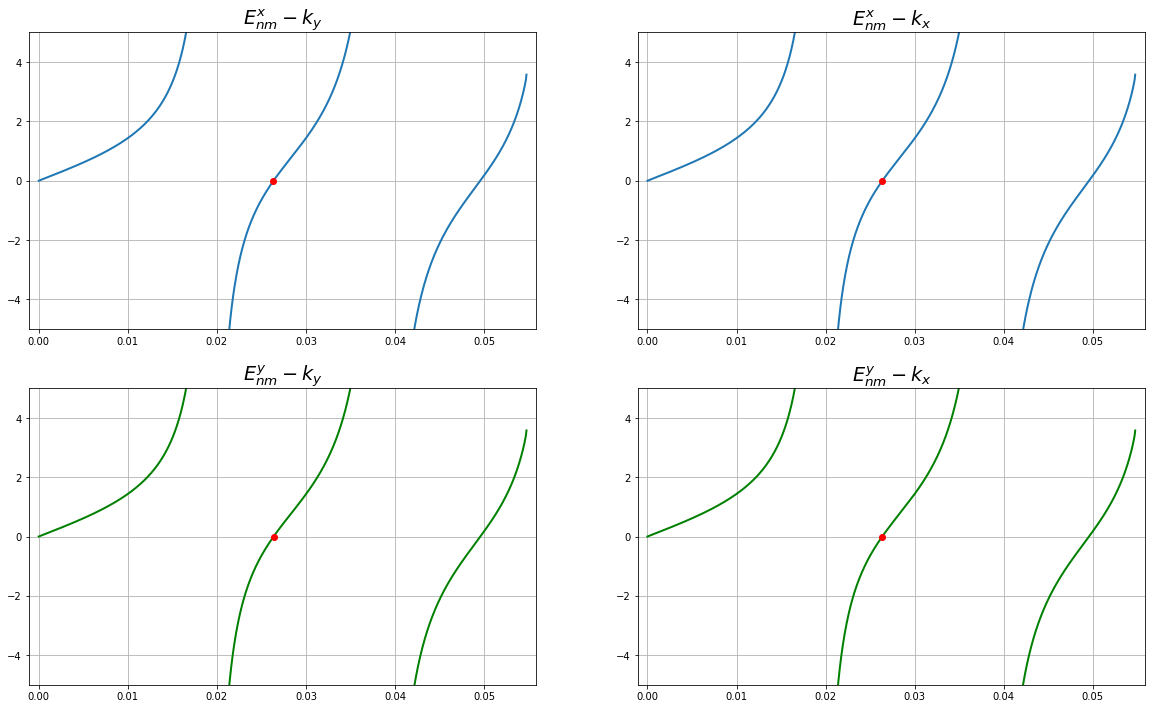

In [6]:
vFc = 0.02  # View factor for graphing (set to 0 for original view)

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
fig1, axs1 = plt.subplots(2,2,figsize=(20,12))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

axs1[0,0].plot(ky/k0, fy_ex, linewidth = 2)
axs1[0,0].plot(ky_exSol/k0, np.zeros(np.size(ky_exSol)), 'ro')
axs1[0,0].set_ylim([-5,5])
axs1[0,0].set_xlim([(-1)*SM.sqrt(n1**2-n2**2)*(vFc)   ,  SM.sqrt(n1**2-n2**2)*(vFc+1)])
axs1[0,0].set_title(r'$E^x_{nm} - k_y$')
axs1[0,0].grid(True)

axs1[0,1].plot(kx/k0, fx_ex, linewidth = 2)
axs1[0,1].plot(kx_exSol/k0, np.zeros(np.size(kx_exSol)), 'ro')
axs1[0,1].set_ylim([-5,5])
axs1[0,1].set_xlim([(-1)*SM.sqrt(n1**2-n2**2)*(vFc)   ,  SM.sqrt(n1**2-n2**2)*(vFc+1)])
axs1[0,1].set_title(r'$E^x_{nm} - k_x$')
axs1[0,1].grid(True)

axs1[1,0].plot(ky/k0, fy_ey, linewidth = 2, color = clrs[2])
axs1[1,0].plot(ky_eySol/k0, np.zeros(np.size(ky_eySol)), 'ro')
axs1[1,0].set_ylim([-5,5])
axs1[1,0].set_xlim([(-1)*SM.sqrt(n1**2-n2**2)*(vFc)   ,  SM.sqrt(n1**2-n2**2)*(vFc+1)])
axs1[1,0].set_title(r'$E^y_{nm} - k_y$')
axs1[1,0].grid(True)

axs1[1,1].plot(kx/k0, fx_ey, linewidth = 2, color = clrs[2])
axs1[1,1].plot(kx_eySol/k0, np.zeros(np.size(kx_eySol)), 'ro')
axs1[1,1].set_ylim([-5,5])
axs1[1,1].set_xlim([(-1)*SM.sqrt(n1**2-n2**2)*(vFc)   ,  SM.sqrt(n1**2-n2**2)*(vFc+1)])
axs1[1,1].set_title(r'$E^y_{nm} - k_x$')
axs1[1,1].grid(True)

In [7]:
print('kx_exSol = ',kx_exSol)
print('ky_exSol = ',ky_exSol)
print('kx_eySol = ',kx_eySol)
print('ky_eySol = ',ky_eySol)

beta_ex = np.sqrt(k0**2 * n1**2 - kx_exSol**2 - ky_exSol**2)
beta_ey = np.sqrt(k0**2 * n1**2 - kx_eySol**2 - ky_eySol**2)

print('beta_ex = ',beta_ex)
print('beta_ey = ',beta_ey)

neffx = beta_ex/k0
neffy = beta_ey/k0

print('neffx = ',neffx)
print('neffy = ',neffy)

kx_exSol =  106895.81952696214
ky_exSol =  106858.65260492374
kx_eySol =  106858.65260492406
ky_eySol =  106895.8195269619
beta_ex =  6078623.034187781
beta_ey =  6078623.034187781
neffx =  1.4995364997790226
neffy =  1.4995364997790226


## Método índice efetivo

### Modo TE

In [8]:
nf = 1.5
ns = 1.49
nc = 1.0
n_diff = nf - ns
a = 5e-6     # Metade do comprimento

neff = np.linspace(ns,nf,1000)
beta = neff*k0
u = a*k0*np.sqrt(nf**2-neff**2)
v = a*k0*np.sqrt(neff**2-ns**2)
w = a*k0*np.sqrt(neff**2-nc**2)

leftTE = u*(v+w)/(u**2-v*w)
leftTE[:-1][np.diff(leftTE) < -5] = np.nan    # NaN = Not a Number

rightTE = np.tan(2*u)
rightTE[:-1][np.diff(rightTE) < -5] = np.nan    # NaN = Not a Number

NameError: name 'colors' is not defined

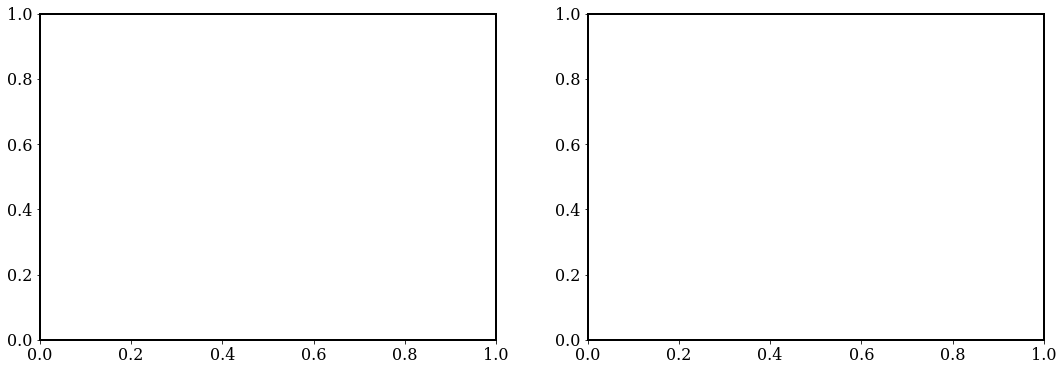

In [9]:
vFc = 0.01  # View factor for graphing (set to 0 for original view)

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14}

figure1, axs = plt.subplots(1, 2, figsize=(18,6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)

axs[0].plot(neff, leftTE, label = 'LHS', color = colors[2])
axs[0].plot(neff, rightTE, label = 'RHS_TE', color = colors[1])
axs[0].set_xlabel(r'n$_{eff}$', fontsize = 20)
axs[0].set_ylabel(r'RHS and LHS', fontsize = 20)
axs[0].set_xlim([ns - n_diff*vFc ,  nf + n_diff*vFc])
axs[0].set_ylim([-10,5])
axs[0].legend(loc = 'upper left', fontsize = 16)
axs[0].grid(True)

axs[1].plot(beta, leftTE, label = 'LHS', color = colors[2])
axs[1].plot(beta, rightTE, label = 'RHS_TE', color = colors[1])
axs[1].set_xlabel(r'$\beta$', fontsize = 20)
axs[1].set_ylabel(r'RHS and LHS', fontsize = 20)
axs[1].set_xlim([ns*k0 - n_diff*k0*vFc ,  nf*k0 + n_diff*k0*vFc])
axs[1].set_ylim([-10,5])
axs[1].legend(loc = 'upper left', fontsize = 16)
axs[1].grid(True)

### Modo TM

In [ ]:
nf = 1.5
ns = 1.495
nc = 1
n_diff = nf - ns
a = 1e-6     # Metade do comprimento

neff = np.linspace(ns,nf,1000)
beta = neff*k0
u = a*k0*np.sqrt(nf**2-neff**2)
v = a*k0*np.sqrt(neff**2-ns**2)
w = a*k0*np.sqrt(neff**2-nc**2)

leftTE = u*((nf/ns)**2*v+(nf/nc)**2*w)/(u**2-v*w*(nf/nc)**2*(nf/ns)**2)
leftTE[:-1][np.diff(leftTE) < -5] = np.nan    # NaN = Not a Number

rightTE = np.tan(2*u)
rightTE[:-1][np.diff(rightTE) < -5] = np.nan    # NaN = Not a Number

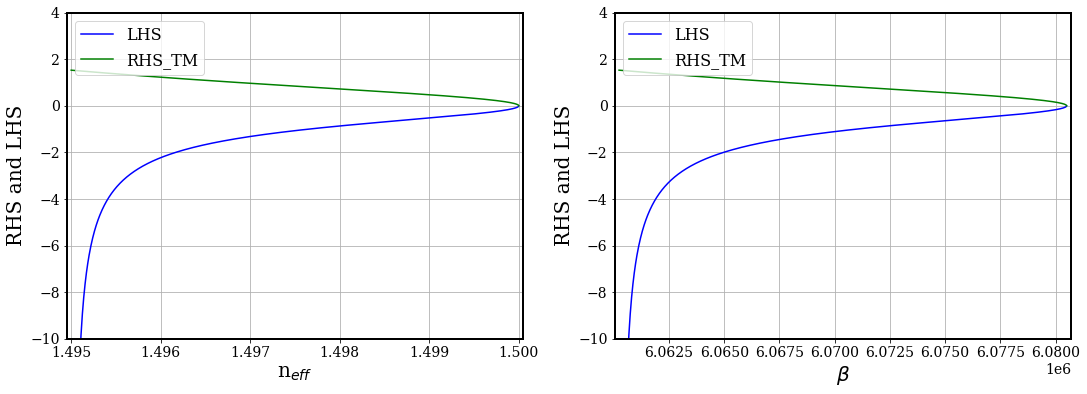

In [ ]:
vFc = 0.01  # View factor for graphing (set to 0 for original view)

font3 = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 12}

figure1, axs = plt.subplots(1, 2, figsize=(18,6))
plt.rc('font', **font3)
plt.rc('axes', linewidth=2)

axs[0].plot(neff, leftTE, label = 'LHS', color = colors[0])
axs[0].plot(neff, rightTE, label = 'RHS_TM', color = colors[2])
axs[0].set_xlabel(r'n$_{eff}$', fontsize = 20)
axs[0].set_ylabel(r'RHS and LHS', fontsize = 20)
axs[0].set_xlim([ns - n_diff*vFc ,  nf + n_diff*vFc])
axs[0].set_ylim([-10,4])
axs[0].legend(loc = 'upper left', fontsize = 16)
axs[0].grid(True)

axs[1].plot(beta, leftTE, label = 'LHS', color = colors[0])
axs[1].plot(beta, rightTE, label = 'RHS_TM', color = colors[2])
axs[1].set_xlabel(r'$\beta$', fontsize = 20)
axs[1].set_ylabel(r'RHS and LHS', fontsize = 20)
axs[1].set_xlim([ns*k0 - n_diff*k0*vFc ,  nf*k0 + n_diff*k0*vFc])
axs[1].set_ylim([-10,4])
axs[1].legend(loc = 'upper left', fontsize = 16)
axs[1].grid(True)

### Equação característica (Alternativa para cálculo dos parâmetros dos modos TE e TM)

In [21]:
# Código altamente baseado no repositório do professor Adolfo H.

nf = 1.44
ns = 1.33
nc = 1
a = 1e-9

betaTE,neffTE,kfTE,alsTE,alcTE,MTE = ds.adguide(nf, nc, ns, lmbd, a, 'TE')
df = pd.DataFrame({"neff": neffTE, 
                       "kf": kfTE,
                       "als": alsTE,
                       "alc": alcTE,})
df.index.names = ['TE']
df

,neff,kf,als,alc
TE,,,,


## Campo elétrico

In [ ]:
kxSol = 113015.46 
kySol = 112979.16 
gamma_2 = SM.sqrt(k0**2*(n1**2-n2**2)-kxSol**2)
gamma_3 = SM.sqrt(k0**2*(n1**2-n3**2)-kxSol**2)
gamma_4 = SM.sqrt(k0**2*(n1**2-n4**2)-kySol**2)
gamma_5 = SM.sqrt(k0**2*(n1**2-n5**2)-kySol**2)

phix = np.arctan(-kxSol/(p3*gamma_3))
phiy = np.arctan(-gamma_5/kySol)

print('gamma_2 = ',gamma_2)
print('gamma_3 = ',gamma_3)
print('gamma_4 = ',gamma_4)
print('gamma_5 = ',gamma_5)

print('phix = ',phix)
print('phiy = ',phiy)


gamma_2 =  191069.99995651198
gamma_3 =  191069.99995651198
gamma_4 =  191091.4662879729
gamma_5 =  191091.4662879729
phix =  -0.5335523234646882
phiy =  -1.036849721635599


Text(0.5, 0.5, 'y')

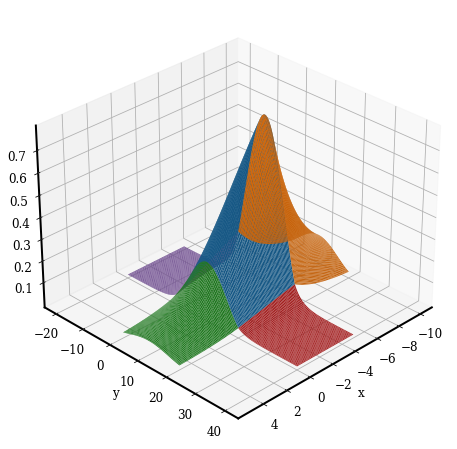

In [ ]:
fig3, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize = (8,8))

A1 = 1
A2 = np.sin(-kxSol * a + phix )
A3 = np.sin(phix)
A4 = p4 * np.cos(kySol* b + phiy)
A5 = p5 * np.cos(phiy)

x = np.linspace(-a, 0, 100)
y = np.linspace( 0, b, 100)
X,Y = np.meshgrid(x, y)
Z1  = A1 * np.sin(kxSol * X + phix) * np.cos(kySol * Y + phiy)
ax.plot_surface(1e6*X, 1e6*Y, Z1*np.conjugate(Z1))

x   = np.linspace(-2*a, -a, 100)
X,Y = np.meshgrid(x, y)
Z2  = A2 * np.exp(gamma_2 * (X + a)) * np.cos(kySol * Y + phiy)
ax.plot_surface(1e6*X, 1e6*Y, Z2*np.conjugate(Z2))

x   = np.linspace(0, a, 100)
X,Y = np.meshgrid(x, y)
Z3  = A3 * np.exp(-gamma_3 * X) * np.cos(kySol * Y + phiy)
ax.plot_surface(1e6*X, 1e6*Y, Z3*np.conjugate(Z3))

x = np.linspace(-a, 0, 100)
y = np.linspace(b, 2*b, 500)
X, Y = np.meshgrid(x, y)
Z4 = A4 * np.exp(-gamma_4 * (Y - b)) * np.sin(kxSol * X + phix)
ax.plot_surface(1e6*X, 1e6*Y, Z4*np.conjugate(Z4))

y = np.linspace(-b, 0, 500)
X, Y = np.meshgrid(x, y)
Z5 = A5 * np.exp(gamma_5 * Y) * np.sin( kxSol * X + phix)
ax.plot_surface(1e6*X, 1e6*Y, Z5*np.conjugate(Z5))

ax.view_init(30,45)
ax.set_xlabel('x')
ax.set_ylabel('y')

## Fator de confinamento

In [ ]:
nf = 1.5
ns = 1.49
nc = 1

a1 = 3e-6
a2 = 5e-6
a3 = 3e-6

lmbd = 1.55e-6
c0 = 299792458
k0 = 2*np.pi/lmbd
pc = (nf**2)/(nc**2)
ps = (nf**2)/(ns**2)
Na = np.sqrt(nf**2-ns**2)

Vc1 = k0 * a1 *np.sqrt(nf**2 - ns**2)
Vc2 = k0 * a2 *np.sqrt(nf**2 - ns**2)
Vc3 = k0 * a3 *np.sqrt(nf**2 - ns**2)

delta = (ns**2 - nc**2)/(nf**2 - ns**2)
nm1 = 1 + int(np.floor((2*Vc1 - np.arctan(np.sqrt(delta)))/np.pi))
nm2 = 1 + int(np.floor((2*Vc2 - np.arctan(np.sqrt(delta)))/np.pi))
nm3 = 1 + int(np.floor((2*Vc3 - np.arctan(np.sqrt(delta)))/np.pi))

tol = 1e-10
r = 0.5

R1 = k0*a1*np.sqrt(nf**2 - ns**2) #V - Frequência normalizada
R2 = k0*a2*np.sqrt(nf**2 - ns**2) #V - Frequência normalizada
R3 = k0*a3*np.sqrt(nf**2 - ns**2) #V - Frequência normalizada

un_1 = np.zeros(nm1)
un1_1 = np.zeros(nm1)
v_1 = np.zeros(nm1)
w_1 = np.zeros(nm1)
b_1 = np.zeros(nm1) 
neffnumericoTE_1 = np.zeros(nm1)

un_2 = np.zeros(nm2)
un1_2 = np.zeros(nm2)
v_2 = np.zeros(nm2)
w_2 = np.zeros(nm2)
b_2 = np.zeros(nm2) 
neffnumericoTE_2 = np.zeros(nm2)

un_3 = np.zeros(nm3)
un1_3 = np.zeros(nm3)
v_3 = np.zeros(nm3)
w_3 = np.zeros(nm3)
b_3 = np.zeros(nm3) 
neffnumericoTE_3 = np.zeros(nm3)

for m in range(nm1):
    un_1[m] = 0
    un1_1[m] = R1
    v_1[m] = 0
    w_1[m] = R1*np.sqrt(delta)

    while(np.absolute(un_1[m] - un1_1[m]) > tol):
        un_1[m] = un1_1[m]
        F = 0.5*m*np.pi + 0.5*np.arctan(v_1[m]/un_1[m]) + 0.5*np.arctan(w_1[m]/un_1[m])
        un1_1[m] = r*F + (1-r)*un_1[m]
        v_1[m] = np.sqrt(R1**2 - un1_1[m]**2)
        w_1[m] = np.sqrt((R1**2)*delta + v_1[m]**2)
    b_1[m] = (v_1[m]/R1)**2
    neffnumericoTE_1[m] = np.sqrt(b_1[m]*(nf**2 - ns**2) + ns**2)
print('neff1 = {0}'.format(neffnumericoTE_1))

for m in range(nm2):
    un_2[m] = 0
    un1_2[m] = R2
    v_2[m] = 0
    w_2[m] = R2*np.sqrt(delta)

    while(np.absolute(un_2[m] - un1_2[m]) > tol):
        un_2[m] = un1_2[m]
        F = 0.5*m*np.pi + 0.5*np.arctan(v_2[m]/un_2[m]) + 0.5*np.arctan(w_2[m]/un_2[m])
        un1_2[m] = r*F + (1-r)*un_2[m]
        v_2[m] = np.sqrt(R2**2 - un1_2[m]**2)
        w_2[m] = np.sqrt((R2**2)*delta + v_2[m]**2)
    b_2[m] = (v_2[m]/R2)**2
    neffnumericoTE_2[m] = np.sqrt(b_2[m]*(nf**2 - ns**2) + ns**2)
print('neff2 = {0}'.format(neffnumericoTE_2))

for m in range(nm3):
    un_3[m] = 0
    un1_3[m] = R3
    v_3[m] = 0
    w_3[m] = R3*np.sqrt(delta)

    while(np.absolute(un_3[m] - un1_3[m]) > tol):
        un_3[m] = un1_3[m]
        F = 0.5*m*np.pi + 0.5*np.arctan(v_3[m]/un_3[m]) + 0.5*np.arctan(w_3[m]/un_3[m])
        un1_3[m] = r*F + (1-r)*un_3[m]
        v_3[m] = np.sqrt(R3**2 - un1_3[m]**2)
        w_3[m] = np.sqrt((R3**2)*delta + v_3[m]**2)
    b_3[m] = (v_3[m]/R3)**2
    neffnumericoTE_3[m] = np.sqrt(b_3[m]*(nf**2 - ns**2) + ns**2)
print('neff3 = {0}'.format(neffnumericoTE_3))


pc = (neffnumericoTE_2[0]**2)/(neffnumericoTE_1[0]**2)
ps = (neffnumericoTE_2[0]**2)/(neffnumericoTE_3[0]**2)

a = 10e-6

Vc = k0 * a *np.sqrt(neffnumericoTE_2[0]**2 - neffnumericoTE_3[0]**2)
delta = (neffnumericoTE_3[0]**2 - neffnumericoTE_1[0]**2)/(neffnumericoTE_2[0]**2 - neffnumericoTE_3[0]**2)
nm = 1 + int(np.floor((2*Vc - np.arctan(np.sqrt(delta)))/np.pi))
tol = 1e-10
r = 0.5
R = k0*a*np.sqrt(neffnumericoTE_2[0]**2 - neffnumericoTE_3[0]**2) #V - Frequência normalizada
un = np.zeros(nm)
un1 = np.zeros(nm)
v = np.zeros(nm)
w = np.zeros(nm)
b = np.zeros(nm) 
phi = np.zeros(nm)
fc = np.zeros(nm)
neffnumericoTM = np.zeros(nm)

for m in range(nm):
    un[m] = 0
    un1[m] = R
    v[m] = 0
    w[m] = R*np.sqrt(delta)

    while(np.absolute(un[m] - un1[m]) > tol):
        un[m] = un1[m]
        F = 0.5*m*np.pi + 0.5*np.arctan(ps*v[m]/un[m]) + 0.5*np.arctan(pc*w[m]/un[m])
        un1[m] = r*F + (1-r)*un[m]
        v[m] = np.sqrt(R**2 - un1[m]**2)
        w[m] = np.sqrt((R**2)*delta + v[m]**2)
    b[m] = (v[m]/R)**2
    neffnumericoTM[m] = np.sqrt(b[m]*(neffnumericoTE_2[0]**2 - neffnumericoTE_3[0]**2) + neffnumericoTE_3[0]**2)
print('neffTM = {0}'.format(neffnumericoTM))

for m in range(nm):
    phi[m] = m*np.pi/2 + np.arctan(pc*w[m]/un[m])/2 - np.arctan(ps*v[m]/un[m])/2
    fc[m] = ((1/(2*w[m]))*np.sin(un[m] + phi[m])**2 + (1/(2*v[m]))*np.sin(un[m] - phi[m])**2 + 1)/(pc*(1/(2*w[m]))*np.cos(un[m] + phi[m])**2 + ps*(1/(2*v[m]))*np.cos(un[m] - phi[m])**2 + (1/(2*w[m]))*np.sin(un[m] + phi[m])**2 + (1/(2*v[m]))*np.sin(un[m] - phi[m])**2 + 1)

print('Γ = {0}'.format(fc))

neff1 = [1.4966564]
neff2 = [1.49853296 1.494276  ]
neff3 = [1.4966564]
neffTM = [1.4982527  1.49746811]
Γ = [0.96077862 0.81072407]
